In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyreadr

# %matplotlib inline
# from mpl_toolkits.mplot3d import Axes3D
# plt.rcParams['figure.figsize'] = (16, 9)
# plt.style.use('ggplot')

In [5]:
#import pandas as pd

data ='./data/eh21.RData'
df = pyreadr.read_r(data)
#df = pd.read_csv('./data/en2020.csv', delimiter='|')

print(df.keys())
eh21p = df["eh21p"]
eh21v = df["eh21v"]
eh21di = df["eh21di"]
eh21eq =df["eh21eq"]
eh21v.head()

odict_keys(['eh21p', 'eh21v', 'eh21di', 'eh21eq'])


,folio,depto,area,s07a_01,s07a_02,s07a_02e,s07a_03,s07a_03e,s07a_03a,s07a_04,...,s07a_26,s07a_27,s07a_28,s07a_29,s07a_30,totper,hogar,upm,estrato,factor
0,111-000005-A-0021,1.0,1.0,1.0,1.0,,2.0,,2.0,NaN,...,2.0,NaN,1.0,2.0,NaN,5.0,1.0,111-000005-A,11,237.919846
1,111-000005-A-0051,1.0,1.0,1.0,1.0,,3.0,,NaN,NaN,...,2.0,NaN,1.0,2.0,NaN,6.0,1.0,111-000005-A,11,237.919846
2,111-000005-A-0081,1.0,1.0,1.0,1.0,,3.0,,NaN,NaN,...,2.0,NaN,2.0,NaN,NaN,1.0,1.0,111-000005-A,11,237.919846
3,111-000078-A-0011,1.0,1.0,1.0,3.0,,NaN,,NaN,1000.0,...,2.0,NaN,1.0,3.0,1.0,8.0,1.0,111-000078-A,11,128.693008
4,111-000078-A-0021,1.0,1.0,1.0,1.0,,3.0,,NaN,NaN,...,2.0,NaN,1.0,1.0,4.0,6.0,1.0,111-000078-A,11,128.693008


In [6]:
from sklearn.model_selection import train_test_split

In [16]:
eh21p.describe()

,depto,area,nro,s01a_02,s01a_03,s01a_04a,s01a_04b,s01a_04c,s01a_05,s01a_05a,...,yhog,yhogpc,z,zext,p0,p1,p2,pext0,pext1,pext2
count,42090.000000,42090.000000,42090.000000,42090.000000,42090.000000,42090.000000,42090.000000,42090.000000,42090.000000,42090.000000,...,42061.000000,42061.000000,42090.000000,42090.000000,42061.000000,42061.000000,42061.000000,42061.000000,42061.000000,42061.000000
mean,4.304253,1.229627,2.579401,1.512996,30.164291,15.181920,6.578047,1990.726895,2.489617,0.600119,...,5162.163323,1432.174749,855.736130,421.144206,0.379901,0.144917,0.078718,0.117472,0.046143,0.026210
std,2.415331,0.420598,1.550585,0.499837,20.775893,8.659553,3.329620,20.777089,1.578969,0.876224,...,4122.028791,1331.408906,156.253632,57.649113,0.485368,0.240247,0.171763,0.321986,0.155181,0.109164
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1922.000000,1.000000,0.000000,...,16.666668,6.000000,637.500000,346.799988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,13.000000,8.000000,4.000000,1976.000000,1.000000,0.000000,...,2548.166504,636.666626,786.099976,386.899994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,2.000000,2.000000,27.000000,15.000000,7.000000,1994.000000,3.000000,0.000000,...,4130.666504,1080.866699,824.200012,397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,1.000000,3.000000,2.000000,45.000000,23.000000,9.000000,2008.000000,3.000000,1.000000,...,6630.416504,1796.553345,1033.400024,489.899994,1.000000,0.242039,0.058583,0.000000,0.000000,0.000000
max,9.000000,2.000000,14.000000,2.000000,98.000000,31.000000,12.000000,2021.000000,12.000000,11.000000,...,63534.167969,44116.664062,1065.099976,500.500000,1.000000,0.994001,0.988037,1.000000,0.987193,0.974550


In [4]:
print(df.groupby('Nombre DEPARTAMENTO').size())

Nombre DEPARTAMENTO
BENI          1351
CHUQUISACA    1859
COCHABAMBA    6390
LA PAZ        9214
ORURO         1704
PANDO          403
POTOSI        2364
SANTA CRUZ    9016
TARIJA        1856
dtype: int64


/tmp/ipykernel_6259/4292216768.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Nombre DEPARTAMENTO'],1).hist()


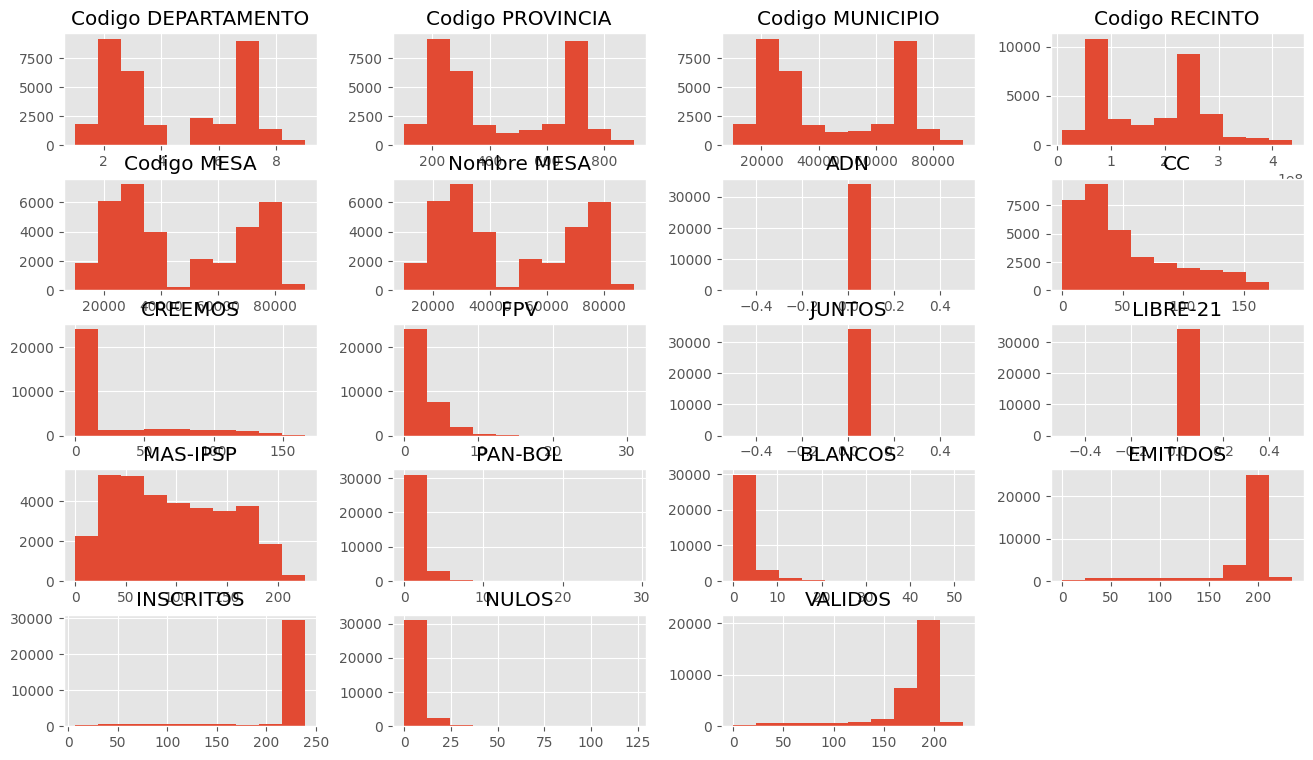

In [5]:
df.drop(['Nombre DEPARTAMENTO'],1).hist()
plt.show()

/home/fabio/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


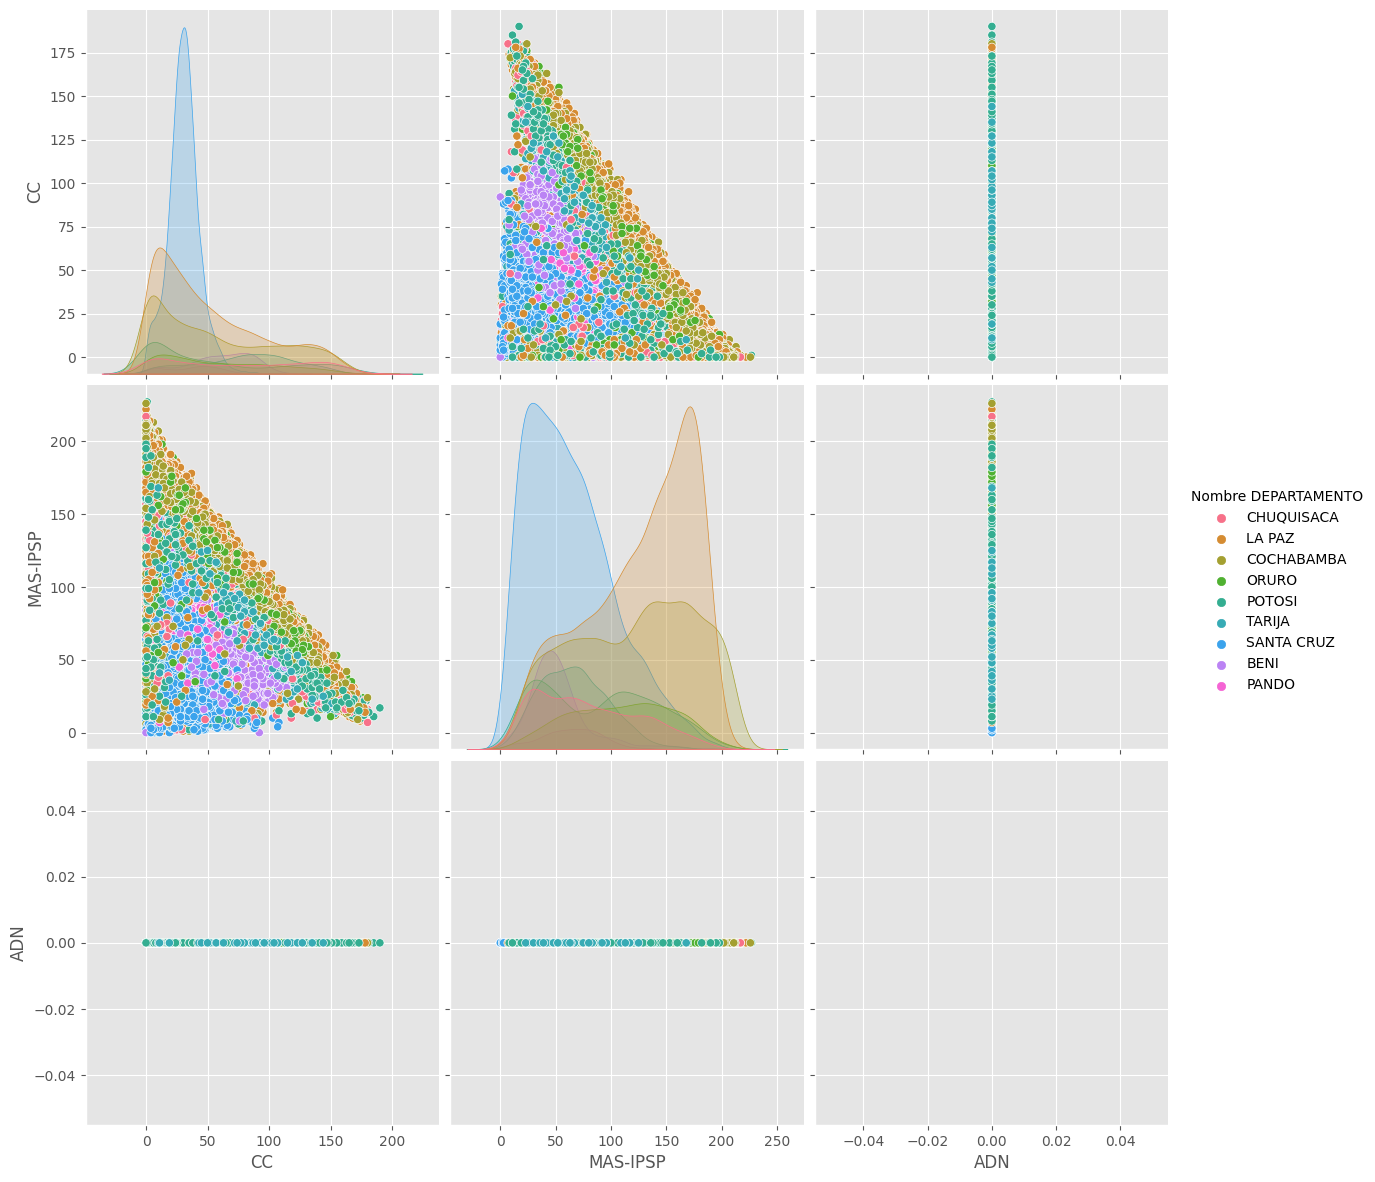

In [6]:
sb.pairplot(df.dropna(), hue='Nombre DEPARTAMENTO',size=4,vars=["CC","MAS-IPSP","ADN"],kind='scatter')